In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [169]:
df = pd.read_csv('train.csv')
df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


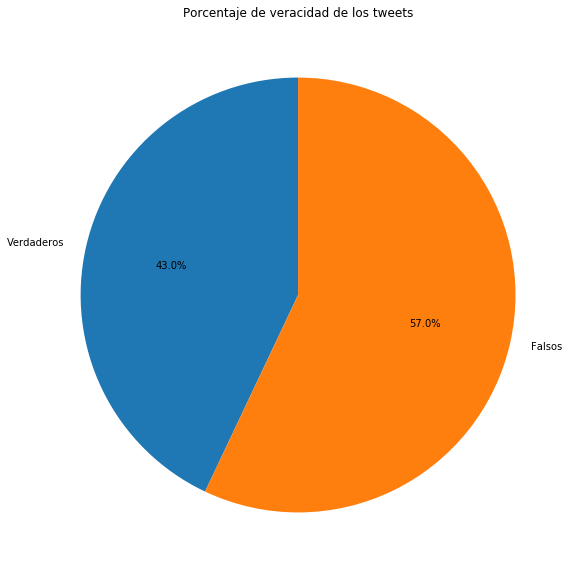

In [170]:
tweets_reales_count = df[tweets['target'] == 1]['target'].count()
tweets_falsos_count = df[tweets['target'] == 0]['target'].count()
grafico = plt.pie([tweets_reales_count, tweets_falsos_count],labels=['Verdaderos', 'Falsos'], startangle=90, autopct='%1.1f%%')
plt.title("Porcentaje de veracidad de los tweets")
plt.show(grafico)

In [171]:
df['largo_del_texto'] = df['text'].apply(len)
df['mencion'] = df['text'].str.contains('@').astype(int)
df['hashtag'] = df['text'].str.contains('#').astype(int)
df['url'] = df['text'].str.contains('http').astype(int)
df['Sin palabra clave'] =  ((df['text'].str.contains('@') == False) & \
(df['text'].str.contains('#')  == False) & \
(df['text'].str.contains('http') == False)).astype(int)
df.tail(10) 


,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin palabra clave
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1,136,0,0,1,0
7604,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,136,0,1,1,0
7605,10864,NaN,NaN,on the flip side I'm at Walmart and there is a...,1,114,0,0,0,1
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,121,0,0,1,0
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,134,0,1,1,0
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83,0,0,1,0
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125,1,0,0,0
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,0,0,1,0
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137,0,0,0,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,94,0,0,1,0


In [172]:
cant_verdaderos = df[df['target'] == 1]['target'].count()
cant_falsos = df[df['target'] == 0]['target'].count()
tweets_red = df[['target', 'mencion', 'hashtag', 'url', 'Sin palabra clave']]
plotdata = tweets_red.groupby('target').agg({'url': 'sum', 'mencion':  'sum', 'hashtag': 'sum', 'Sin palabra clave': 'sum'})
plotdata.columns = ['Contiene URL(http)', 'Contiene mención(@user)', 'Contiene Hashtag(#)', 'Sin palabras clave']
plotdata = plotdata.transpose()
plotdata[0] = plotdata[0]*100/cant_falsos
plotdata[1] = plotdata[1]*100/cant_verdaderos
plotdata.columns = ['Tweets falsos', 'Tweets verdaderos']
plotdata = plotdata[plotdata.columns[::-1]] #Cambio el orden de las columnas
plotdata

,Tweets verdaderos,Tweets falsos
Contiene URL(http),66.401712,41.432520
Contiene mención(@user),20.666463,31.391064
Contiene Hashtag(#),26.750229,20.405343
Sin palabras clave,15.805564,30.561953


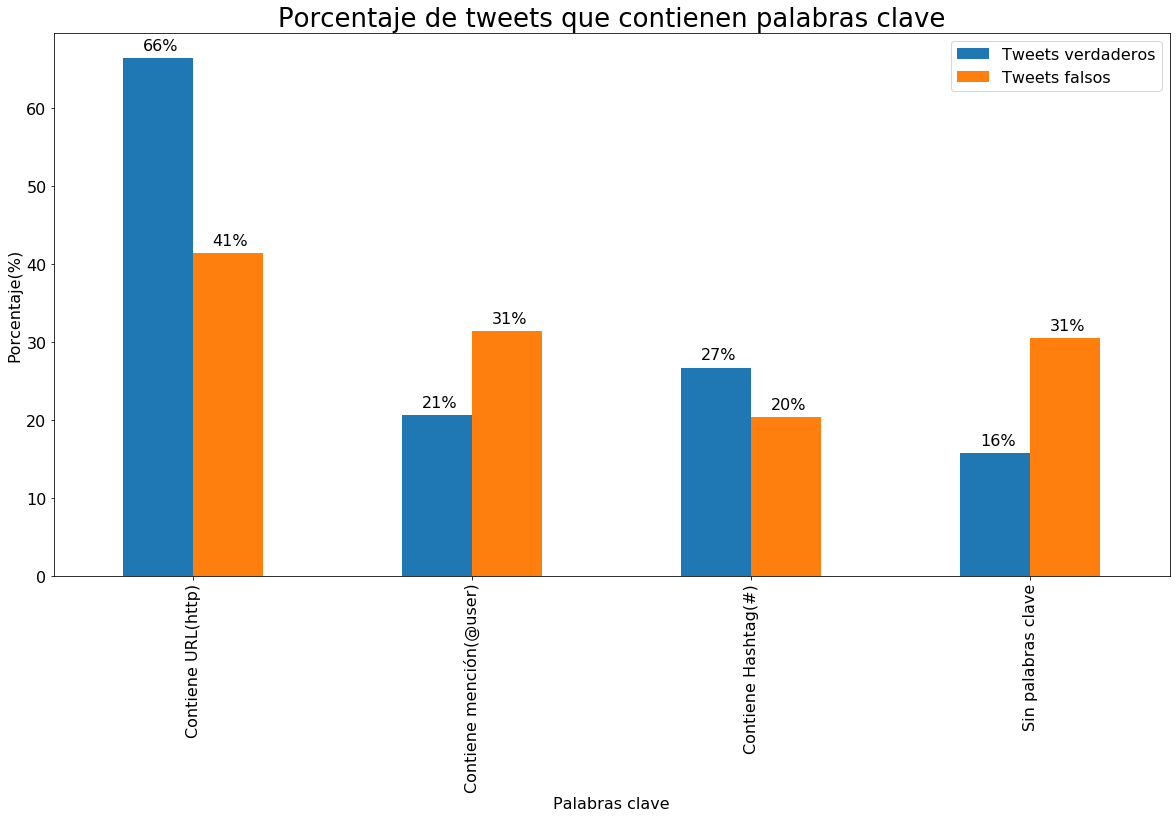

In [176]:
ax = plotdata.plot(kind="bar", stacked=False, fontsize= 16)
plt.title("Porcentaje de tweets que contienen palabras clave", fontsize=26)
plt.xlabel("Palabras clave", fontsize= 16)
plt.ylabel("Porcentaje(%)", fontsize= 16)
plt.legend(fontsize=16)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate("{:.0%}".format(height/100), xy=(x+0.07, y + height + 1), fontsize=16)

In [177]:
tweets_reales = df[df['target'] == 1]
tweets_reales.head()

,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin palabra clave
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,1,0,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,0,0,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,0,0,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,1,0,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,1,0,0


In [178]:
tweets_falsos = df[df['target'] == 0]
tweets_falsos.head()

,id,keyword,location,text,target,largo_del_texto,mencion,hashtag,url,Sin palabra clave
15,23,NaN,NaN,What's up man?,0,14,0,0,0,1
16,24,NaN,NaN,I love fruits,0,13,0,0,0,1
17,25,NaN,NaN,Summer is lovely,0,16,0,0,0,1
18,26,NaN,NaN,My car is so fast,0,17,0,0,0,1
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,28,0,0,0,1
